### 0. Importación de la data

Cambiar path de alojamiento de datos.

In [314]:
import pandas as pd

In [315]:
data = pd.read_csv("D:/AI_GAMES/earthquakes.csv")

In [316]:
data.columns

Index(['Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Sec', 'Tsu', 'Vol', 'Location Name',
       'Latitude', 'Longitude', 'Focal Depth (km)', 'Mag', 'MMI Int', 'Deaths',
       'Death Description', 'Missing', 'Missing Description', 'Injuries',
       'Injuries Description', 'Damage ($Mil)', 'Damage Description',
       'Houses Destroyed', 'Houses Destroyed Description', 'Houses Damaged',
       'Houses Damaged Description', 'Total Deaths', 'Total Death Description',
       'Total Missing', 'Total Missing Description', 'Total Injuries',
       'Total Injuries Description', 'Total Damage ($Mil)',
       'Total Damage Description', 'Total Houses Destroyed',
       'Total Houses Destroyed Description', 'Total Houses Damaged',
       'Total Houses Damaged Description'],
      dtype='object')

### 1. Segmentación del subconjunto de datos

In [317]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

In [318]:
#main base variables - data should have at least one
main_variables = ["Mag", "Focal Depth (km)","MMI Int"]

In [319]:
#base sampling data definition using 'main_varaibles'
baseSamplingData = data.loc[data[main_variables].dropna().index]

### 2. Mapa de calor de correlación

Mapa triangular de calor de correlación para medidas sismológicas de Magnitud e Intensidad.

In [320]:
#extension to additional variables for correlation Map
main_variables[0:0] = ["Total Deaths", "Total Injuries", "Total Houses Destroyed"]

#definition of sub dataset
samplingData = baseSamplingData[main_variables]

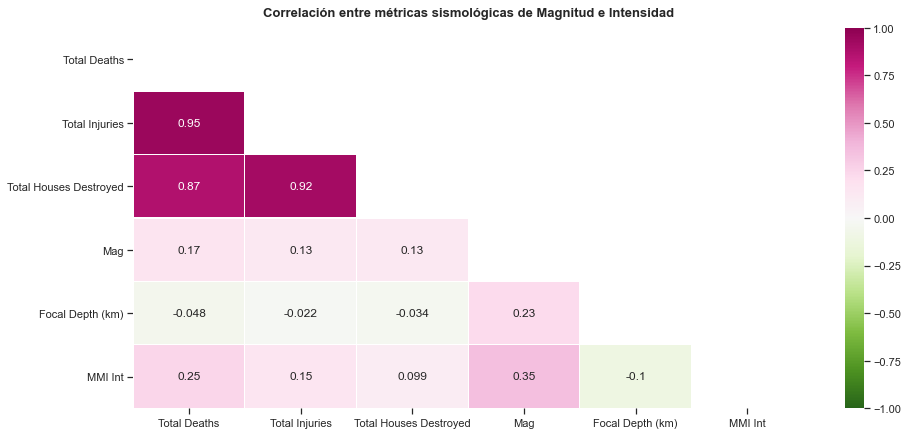

In [321]:
#triangular correlation map
matrixCorr = np.triu(samplingData.corr())

#plot dimensions
plt.figure(figsize=(15, 7))

#seaborn base heatmap
sns.heatmap(
    samplingData.corr(), annot = True, vmin=-1, vmax=1, center= 0, 
    cmap= 'PiYG_r', linewidths=0.05, mask=matrixCorr
).set_title(
    'Correlación entre métricas sismológicas de Magnitud e Intensidad', 
    fontdict={'fontsize':13, 'fontweight':'bold'}, 
    pad=12
)

#plt show statement
plt.show()

### 3. Gráfico de distribución 

Gráfico de distribución para variables de magnitud según categoría de desastres naturales.

- Categoría ```Única```: solo sismo.
- Categoría ```Doble```: sismo más tsunami | sismo más erupción volcánica.
- Cateogía ```Triple```: sismo, tsunami y erupción volcánica.

In [322]:
#category function definition
def defining_categories(dataInfo):
    if pd.notna(dataInfo.Tsu) and pd.notna(dataInfo.Vol):
        _ = 'Triple'
    elif (
        pd.notna(dataInfo.Tsu) and pd.isnull(dataInfo.Vol)
    ) or (
        pd.isnull(dataInfo.Tsu) and pd.notna(dataInfo.Vol)
    ):
        _ = 'Doble'
    else: 
        _ = 'Única'
    return _

In [323]:
#function application over dataset - new "category" column 
baseSamplingData["category"] = baseSamplingData[['Tsu', 'Vol']].apply(
    lambda x: defining_categories(x), axis=1
)

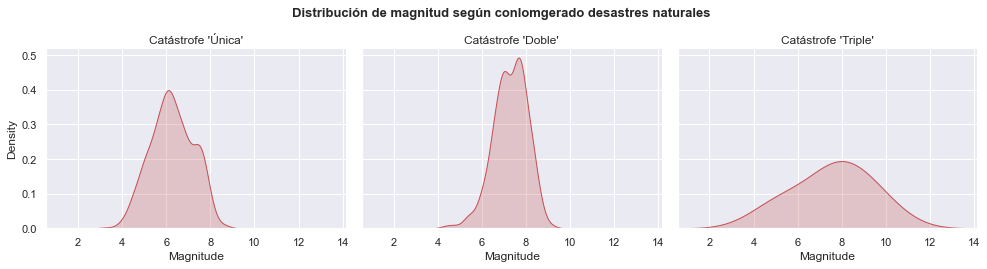

In [324]:
#FacetGrid DistPlot 
sns.set_theme(style="darkgrid", font='arial', context='notebook')
d = {'color':'red','shade':'True'}
g = sns.FacetGrid(baseSamplingData, col="category", height=3.8,aspect=1.2, hue_kws=d)
g.map(sns.kdeplot, "Mag")
g.set_axis_labels("Magnitude", "Density")
g.set_titles("Catástrofe '{col_name}'")
plt.subplots_adjust(top=.825)
g.fig.suptitle(
    'Distribución de magnitud según conlomgerado desastres naturales', 
    fontsize=13, 
    fontweight="bold") 
plt.show()

### 4. Violin Plot

Identificar el estado histórico con respecto a los acontecimientos sísmicos a lo largo de los siglos.

In [331]:
#function to create century groups 
def create_century_groups(col):
    list_centuries = [
        "S.I","S.II","S.III", "S.IV", "S.V", 
        "S.VI", "S.VII", "S.VIII", "S.IX", "S.X", 
        "S.XI", "S.XII", "S.XIII", "S.XIV", "S.XV",
        "S.XVI", "S.XVII", "S.XVIII", "S.XIX", "S.XX",
        "S.XXI"
    ]
    
    if col.Year < 0:
        return 'AC'
    else:
        for idxCentury, boundTime in enumerate(range(0,2100,100)):
            if boundTime < col.Year < boundTime+100:
                return list_centuries[idxCentury] 
            else:
                pass

In [335]:
#application of century groups
baseSamplingData["century"] = baseSamplingData[["Year"]].apply(
    lambda x: create_century_groups(x),axis=1
) 

In [344]:
#not enough data
_ = ['AC', 'S.I', 'S.V', 'S.VIII']

In [345]:
#dataset for violin
temp_baseSampling = baseSamplingData.query("century not in @_")

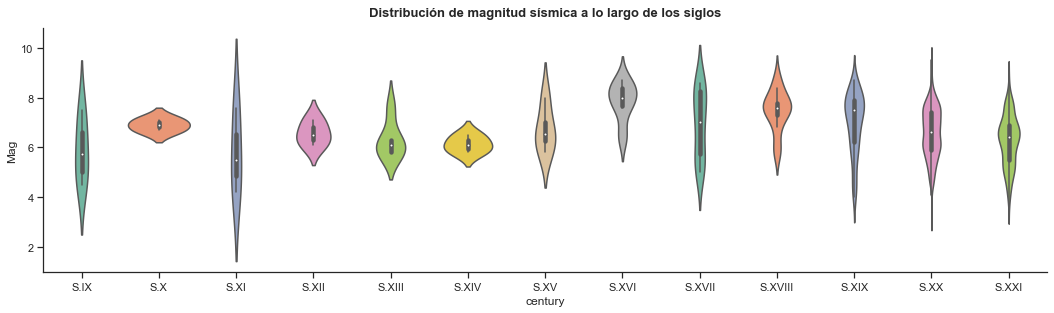

In [347]:
#violin plot: known distribution and statistics metrics

sns.set_style('ticks')
fig, ax = plt.subplots()


fig.set_size_inches(18, 4.5)
sns.violinplot(x="century", y="Mag",
               data=temp_baseSampling, 
               palette="Set2", gridsize=1000).set_title(
    'Distribución de magnitud sísmica a lo largo de los siglos', 
    fontdict={'fontsize':13, 'fontweight':'bold'}, 
    pad=12
)
   
sns.despine()